In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

In [8]:
etf_info = pd.read_csv('/opt/notebooks/AA002/Mirae Asset/미래에셋/data/etf_info.csv', encoding = 'euc_kr')
etf_data = pd.read_csv('/opt/notebooks/AA002/Mirae Asset/미래에셋/data/etf_data.csv', encoding = 'euc_kr', parse_dates= ['tdate'])

In [9]:
etf_ohlcv = etf_data.set_index(['tdate', 'etf_code', 'data_name'])['value'].unstack().unstack()
etf_close = etf_ohlcv['종가']

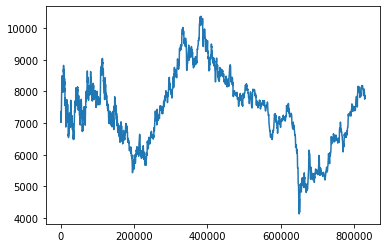

In [20]:
temp = etf_data[etf_data['etf_code']=='A091220']
plt.plot(temp[temp['data_name']=='종가']['value'])

In [10]:
etf_info

,코드,펀드명,분류,벤치마크명,설정일
0,A377990,TIGER Fn신재생에너지,4.국내-전략,FnGuide 신재생에너지 지수,2021-03-04
1,A376410,TIGER 탄소효율그린뉴딜,03.국내-전략,KRX/S&P 탄소효율그린뉴딜지수,2021-02-04
2,A364960,TIGER KRX BBIG K-뉴딜,03.국내-전략,KRX BBIG K-뉴딜,2020-10-06
3,A364980,TIGER KRX2차전지K-뉴딜,03.국내-전략,KRX 2차전지 K-뉴딜 지수,2020-10-06
4,A364970,TIGER KRX바이오K-뉴딜,03.국내-전략,KRX 바이오 K-뉴딜 지수,2020-10-06
...,...,...,...,...,...
122,A261120,TIGER 미국달러선물인버스2X,17.해외-레버리지/인버스,미국달러 선물지수(-2X),2016-12-23
123,A225030,TIGER 미국S&P500선물인버스(H),17.해외-레버리지/인버스,S&P 500 Futures Index(ER),2015-07-27
124,A225060,TIGER 이머징마켓MSCI레버리지(합성 H),17.해외-레버리지/인버스,MSCI EM Index(X2),2015-07-27
125,A261110,TIGER 미국달러선물레버리지,17.해외-레버리지/인버스,미국달러 선물지수(2X),2016-12-23


In [6]:
# 기준점 '2018-12-31'

In [8]:
etf_close = etf_close.pct_change(1)

In [29]:
wholedf = []
for j in etf_close.columns:
    tdf = []
    for i in np.array(range(8))[::-1]:
        tdf.append(etf_close.loc[:'2018-12-31'][j].shift(i))
    tdf = pd.concat(tdf,axis=1)
#     tdf = pd.concat([tdf,etf_close.loc[:'2018-12-31'][j].pct_change(1).shift(-1)],axis=1)
    tdf.columns = ['d-'+str(i) if i!=0 else 'pct_chg' for i in np.array(range(0,8))[::-1]]
    tdf = tdf.dropna()
    names = pd.Series([j]*tdf.shape[0],dtype='str')
    names.index = tdf.index
    tdf['name'] = names
    wholedf.append(tdf)
traindata = pd.concat(wholedf)

In [30]:
wholedf = []
for j in etf_close.columns:
    tdf = []
    for i in np.array(range(8))[::-1]:
        tdf.append(etf_close.loc['2018-12-31':][j].shift(i))
    tdf = pd.concat(tdf,axis=1)
#     tdf = pd.concat([tdf,etf_close.loc['2018-12-31':][j].pct_change(1).shift(-1)],axis=1)
    tdf.columns = ['d-'+str(i) if i!=0 else 'pct_chg' for i in np.array(range(0,8))[::-1]]
    tdf = tdf.dropna()
    names = pd.Series([j]*tdf.shape[0],dtype='str')
    names.index = tdf.index
    tdf['name'] = names
    wholedf.append(tdf)
testdata = pd.concat(wholedf)

* 7일간의 주가 증감(1차분 데이터)을 보고, 8일째 주가가 증가할지 하락할지 예측

In [24]:
traindata

,tdate,d-7,d-6,d-5,d-4,d-3,d-2,d-1,pct_chg,name
0,2012-01-12,0.035865,-0.019688,-0.009695,-0.013287,-0.004961,0.017094,-0.007003,0.002821,A091220
1,2012-01-13,-0.019688,-0.009695,-0.013287,-0.004961,0.017094,-0.007003,0.002821,0.018284,A091220
2,2012-01-16,-0.009695,-0.013287,-0.004961,0.017094,-0.007003,0.002821,0.018284,-0.013812,A091220
3,2012-01-17,-0.013287,-0.004961,0.017094,-0.007003,0.002821,0.018284,-0.013812,0.063025,A091220
4,2012-01-18,-0.004961,0.017094,-0.007003,0.002821,0.018284,-0.013812,0.063025,0.008564,A091220
...,...,...,...,...,...,...,...,...,...,...
97581,2018-12-21,0.013527,0.007909,-0.019617,0.002501,-0.005988,0.009538,-0.014421,-0.003027,A310970
97582,2018-12-24,0.007909,-0.019617,0.002501,-0.005988,0.009538,-0.014421,-0.003027,0.007591,A310970
97583,2018-12-26,-0.019617,0.002501,-0.005988,0.009538,-0.014421,-0.003027,0.007591,-0.016575,A310970
97584,2018-12-27,0.002501,-0.005988,0.009538,-0.014421,-0.003027,0.007591,-0.016575,0.015322,A310970


* 1차분 이후 모든 상품이 정상성을 띄는 것을 볼 수 있음 (Within Confidence region)

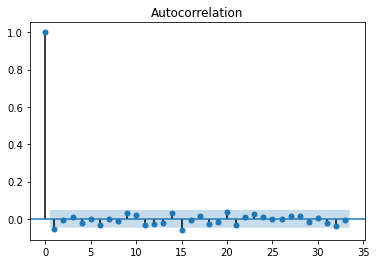

In [117]:
#Example
i=0
plot_acf(traindata[traindata['name']==np.unique(traindata['name'])[i]]['pct_chg'])
plt.show()

In [31]:
traindata.to_csv('traindata_price.csv')
testdata.to_csv('testdata_price.csv')